In [2]:
#Loading technique
from google.colab import files
uploaded =files.upload()

Saving news_tweets_sentiments.csv to news_tweets_sentiments.csv


In [3]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 1000, 'display.max_colwidth', 1000, 'display.max_rows',1000)

# Read Data

In [4]:
def read_data_header(filename,read_lines=3):
    # Stocks Data is in UTC

    #generate header from the file
    with open(filename) as myfile:
        head1 =[]
        for i in range (0,read_lines):
            head1.append([str.split(next(myfile).strip(),sep=',') for x in range(0,1)])

    line1 = head1[0][0]
    line2 = head1[1][0]

    header = [i.replace('^','')+' '+j for i, j in zip(line1, line2)]
    header = [item.replace('var','variance') for item in header]

    return header

In [5]:
filename='/content/news_tweets_sentiments.csv'
header = read_data_header(filename,2)
df= pd.read_csv(filename, sep=',',skiprows=2,names=header)
df.head(20)

,Date,combined count,combined mean,combined variance,negative count,negative mean,negative variance,neutral count,neutral mean,neutral variance,positive count,positive mean,positive variance,CL=FDirection mean,GSPCDirection mean,GSPTSEDirection mean,IXICDirection mean,BTC-USDDirection mean,TSLADirection mean
0,2022-01-26 09:30:00,525,0.068707,0.151383,525,0.064962,0.008351,525,0.836505,0.017578,525,0.098543,0.011310,1.0,NaN,NaN,NaN,1.0,NaN
1,2022-01-26 09:45:00,14,0.167814,0.194481,14,0.032143,0.005186,14,0.841714,0.013768,14,0.126143,0.017315,1.0,1.0,1.0,0.0,1.0,0.0
2,2022-01-26 10:00:00,20,-0.061985,0.185362,20,0.094750,0.015235,20,0.838250,0.015792,20,0.067000,0.007839,2.0,2.0,1.0,2.0,1.0,2.0
3,2022-01-26 10:15:00,10,0.318450,0.093222,10,0.060500,0.005460,10,0.754700,0.007262,10,0.184900,0.006565,1.0,1.0,1.0,1.0,1.0,1.0
4,2022-01-26 10:30:00,6,0.033783,0.265884,6,0.089500,0.012606,6,0.775167,0.025801,6,0.135333,0.038769,1.0,1.0,1.0,1.0,0.0,0.0
5,2022-01-26 10:45:00,11,0.011564,0.150628,11,0.057273,0.005225,11,0.857727,0.006831,11,0.085182,0.005134,1.0,1.0,1.0,1.0,1.0,0.0
6,2022-01-26 11:00:00,15,-0.102753,0.155842,15,0.111133,0.008244,15,0.797067,0.014147,15,0.091733,0.016072,1.0,1.0,1.0,1.0,1.0,1.0
7,2022-01-26 11:15:00,5,0.202060,0.021092,5,0.000000,0.000000,5,0.884600,0.005560,5,0.115400,0.005560,1.0,1.0,1.0,1.0,1.0,2.0
8,2022-01-26 11:30:00,9,0.129378,0.237469,9,0.039444,0.004230,9,0.861778,0.023317,9,0.098778,0.022898,1.0,1.0,1.0,1.0,1.0,1.0
9,2022-01-26 11:45:00,6,-0.228317,0.113142,6,0.154667,0.011812,6,0.796500,0.014794,6,0.048833,0.003038,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
TARGET = ["BTC-USDDirection mean"]
columns_predictors = ['combined mean']
#columns_predictors = ['negative mean','neutral mean','positive mean']
df = df[columns_predictors+TARGET].dropna(how='any')
X = df[columns_predictors]
y = df[TARGET]

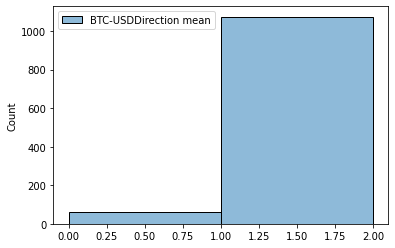

In [7]:
# check for balance data
# labels are balanced i.e equal split of inc and dec.
import seaborn as sns
sns.histplot(data=y, bins=2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b207f61d0>]],
      dtype=object)

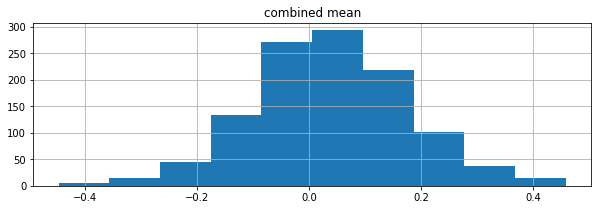

In [8]:
import matplotlib.pyplot as plt
X.hist(figsize=(10,3))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10086)
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")

X_train.shape: (849, 1)
X_test.shape: (284, 1)
y_train.shape: (849, 1)
y_test.shape: (284, 1)


In [10]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

def classification_metric(y_test,y_pred):
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    print("%.2f" % accuracy)
    # Confusion Matrix
    c_matrix= confusion_matrix(y_test,y_pred)
    print(c_matrix)
    return None

def model_evaluation(model,X_train,y_train,X_test,y_test):
    model = model.fit(X_train,y_train)
    # training accuracy
    classification_metric(y_train,model.predict(X_train))

    #testing accuracy
    classification_metric(y_test,model.predict(X_test))
    return None

# SVM Model (Linear Model)

In [11]:
## Linear Features
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

svm_clf = SVC(kernel="linear", C=100)
model_evaluation(svm_clf, X_train,y_train, X_test, y_test)

0.89
[[  0  45   0]
 [  0 755   0]
 [  0  49   0]]
0.89
[[  0  14   0]
 [  0 252   0]
 [  0  18   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
## Polynomial Features Degree 2
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=2)),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))
    ])
model_evaluation(polynomial_svm_clf, X_train,y_train, X_test, y_test)

0.89
[[  0  45   0]
 [  0 755   0]
 [  0  49   0]]
0.89
[[  0  14   0]
 [  0 252   0]
 [  0  18   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("svm_clf", LinearSVC(C=1, loss="hinge", random_state=42))
    ])
model_evaluation(polynomial_svm_clf, X_train,y_train, X_test, y_test)

0.89
[[  0  45   0]
 [  0 755   0]
 [  0  49   0]]
0.89
[[  0  14   0]
 [  0 252   0]
 [  0  18   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# SVM Model (Non_linear Model)

In [14]:
poly_kernel_svm_clf = Pipeline([
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=0.2, C=10))
    ])
model_evaluation(poly_kernel_svm_clf, X_train,y_train, X_test, y_test)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.89
[[  0  45   0]
 [  0 755   0]
 [  0  49   0]]
0.89
[[  0  14   0]
 [  0 252   0]
 [  0  18   0]]


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

# Set seed for reproducibility
SEED=1
# Instantiate lr
lr = LogisticRegression(random_state=SEED)
# Instantiate knn
knn = KNeighborsClassifier(n_neighbors=2)
# Instantiate dt
dt = DecisionTreeClassifier(random_state=SEED)
#Instantiate rf
rf = RandomForestClassifier()
#Instantiate svc
svc = SVC(kernel='linear',  gamma = 10, C= 1)
#Instantiate AdaBoost
AdaBC = AdaBoostClassifier()
#Instantiate XGB
XGBC = XGBClassifier()


# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), 
               ('Decision Tree Classification ', dt), ('Random Forest' , rf), 
               ('SVC', svc),('AdaBoostClassifier', AdaBC) 
               ]


# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
    # Fit clf to the training set
    clf.fit(X_train, y_train)    

    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred) 
    # Confusion Matrix
    c_matrix= confusion_matrix(y_test,y_pred)
    #classification reports
    c_report = classification_report(y_test,y_pred)
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    print(c_matrix)
    print(c_report)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

Logistic Regression : 0.887
[[  0  14   0]
 [  0 252   0]
 [  0  18   0]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.89      1.00      0.94       252
         2.0       0.00      0.00      0.00        18

    accuracy                           0.89       284
   macro avg       0.30      0.33      0.31       284
weighted avg       0.79      0.89      0.83       284

K Nearest Neighbours : 0.799
[[  2  12   0]
 [ 25 225   2]
 [  1  17   0]]
              precision    recall  f1-score   support

         0.0       0.07      0.14      0.10        14
         1.0       0.89      0.89      0.89       252
         2.0       0.00      0.00      0.00        18

    accuracy                           0.80       284
   macro avg       0.32      0.35      0.33       284
weighted avg       0.79      0.80      0.79       284

Decision Tree Classification  : 0.799
[[  0  14   0]
 [ 14 227  11]
 [  0  18   0]]
     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

In [16]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier with specified criterion
rf_class = RandomForestClassifier(criterion='entropy')

# Create the parameter grid
param_grid = {'max_depth': [2, 4, 8, 15], 'max_features': ['auto', 'sqrt']}

# Create a GridSearchCV object
grid_rf_class=GridSearchCV(
    estimator=rf_class,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=4,
    cv=5,
    refit=True, return_train_score=True)
print(grid_rf_class)

GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='accuracy')


In [17]:
grid_rf_class.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(criterion='entropy'),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 8, 15],
                         'max_features': ['auto', 'sqrt']},
             return_train_score=True, scoring='accuracy')

In [18]:


# Extract and print the column with a dictionary of hyperparameters used
column = cv_results_df.loc[:, ['params']]
print(column)

# Extract and print the row that had the best mean test score
best_row = cv_results_df[cv_results_df['rank_test_score'] == 1 ]
print(best_row)

NameError: ignored

In [ ]:
# Print out the ROC_AUC score from the best-performing square
best_score = grid_rf_class.best_score_
print(best_score)

# Create a variable from the row related to the best-performing square
cv_results_df = pd.DataFrame(grid_rf_class.cv_results_)
best_row = cv_results_df.loc[[grid_rf_class.best_index_]]
print(best_row)

# Get the n_estimators parameter from the best-performing square and print
best_n_estimators = grid_rf_class.best_params_
print(best_n_estimators)

In [ ]:
# See what type of object the best_estimator_ property is
print(type(grid_rf_class.best_estimator_))

# Create an array of predictions directly using the best_estimator_ property
predictions = grid_rf_class.best_estimator_.predict(X_test)

# Take a look to confirm it worked, this should be an array of 1's and 0's
print(predictions[0:5])

# Now create a confusion matrix 
print("Confusion Matrix \n", confusion_matrix(y_test, predictions))

# Get the ROC-AUC score
predictions_proba = grid_rf_class.best_estimator_.predict_proba(X_test)[:,1]
print("Accuracy Score \n", accuracy(y_test, predictions_proba))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'max_depth': list(range(5,26)), 'max_features': ['auto' , 'sqrt']} 

# Create a random search object
random_rf_class = RandomizedSearchCV(
    estimator = RandomForestClassifier(n_estimators=80),
    param_distributions = param_grid, n_iter = 5,
    scoring='roc_auc', n_jobs=4, cv = 3, refit=True, return_train_score = True)

# Fit to the training data
random_rf_class.fit(X_train, y_train)
y_pred_rf = random_rf_class.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred) 
    # Confusion Matrix
c_matrix= confusion_matrix(y_test,y_pred)
    #classification reports
c_report = classification_report(y_test,y_pred)

# Print the values used for both hyperparameters
print(random_rf_class.cv_results_['param_max_depth'])
print(random_rf_class.cv_results_['param_max_features'])